In [ ]:
!git clone https://github.com/makataomu/self_recognition.git

fatal: destination path 'self_recognition' already exists and is not an empty directory.


In [ ]:
!git pull

Already up to date.


In [ ]:
%cd self_recognition

[Errno 2] No such file or directory: 'self_recognition'
/content/self_recognition


In [ ]:
!pip install -r requirements.txt  # Install dependencies

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.8/857.8 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 851.6/851.6 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.6/85.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Selecting Samples for Intervention

In [ ]:
import os
os.environ["OPENAI_API_KEY"]=OPENAI_API_KEY

In [ ]:
model_short_name = 'gpt41_nano'
model_api_name = 'gpt-4.1-nano-2025-04-14'

In [ ]:
from data import load_data, save_to_json, load_from_json

DEBUG = True
STARTING_INDEX = 900

main_models = ['gpt4', 'gpt41_nano']

models = main_models

xsum_responses, xsum_articles, xsum_keys = load_data('xsum')
cnn_responses, cnn_articles, cnn_keys = load_data('cnn')

xsum_results = {}
cnn_results = {}
for model in models:
    xsum_results[model] = load_from_json(f'results/xsum/{model}_results.json')
    cnn_results[model] = load_from_json(f'results/cnn/{model}_results.json')
    if not DEBUG:
      if model in main_models:
          continue
    else:
      xsum_results[model] = [i for i in xsum_results[model] if i['key'] in xsum_keys[STARTING_INDEX:]]
      cnn_results[model] = [i for i in cnn_results[model] if i['key'] in cnn_keys[STARTING_INDEX:]]

# Individual setting results
xsum_detection_results = {}
xsum_score_results = {}
cnn_detection_results = {}
cnn_score_results = {}
for model in models:
    dataset = 'xsum'
    xsum_detection_results[model] = load_from_json(f'individual_setting_results/recognition_results/{dataset}/{model}_results.json')
    xsum_score_results[model] = load_from_json(f'individual_setting_results/score_results/{dataset}/{model}_results.json')
    dataset = 'cnn'
    cnn_detection_results[model] = load_from_json(f'individual_setting_results/recognition_results/{dataset}/{model}_results.json')
    cnn_score_results[model] = load_from_json(f'individual_setting_results/score_results/{dataset}/{model}_results.json')

    if not DEBUG:
      if model in main_models:
          continue
    else:
        xsum_detection_results[model] = [i for i in xsum_detection_results[model] if i['key'] in xsum_keys[STARTING_INDEX:]]
        xsum_score_results[model] = [i for i in xsum_score_results[model] if i['key'] in xsum_keys[STARTING_INDEX:]]
        cnn_detection_results[model] = [i for i in cnn_detection_results[model] if i['key'] in cnn_keys[STARTING_INDEX:]]
        cnn_score_results[model] = [i for i in cnn_score_results[model] if i['key'] in cnn_keys[STARTING_INDEX:]]

[Errno 2] No such file or directory: 'summaries/xsum_train_gpt35_responses.json'
[Errno 2] No such file or directory: 'summaries/xsum_train_llama_responses.json'
[Errno 2] No such file or directory: 'summaries/cnn_train_claude_responses.json'
[Errno 2] No such file or directory: 'summaries/cnn_train_gpt35_responses.json'
[Errno 2] No such file or directory: 'summaries/cnn_train_llama_responses.json'


as gpt4.1 is good at recognizing it's own text from human's text, we can try to paraphrase exactly those summaries

In [ ]:
model = model_short_name

In [ ]:
dataset_results = xsum_results.copy()
dataset_detection_results = xsum_detection_results.copy()

for pairwise comparisons

In [ ]:
def select_strong_self_preference(dataset_results, model_name, other="human", rec_threshold=0.9, pref_threshold=0.9):
    return [
        r for r in dataset_results[model_name]
        if  r['self_preference'] >= pref_threshold
        and r['detection_score'] >= rec_threshold
        and r['model'] == other
    ]

results_strong_pref = select_strong_self_preference(dataset_results, model)
article_keys = [d['key'] for d in results_strong_pref]
articles_pair = {k: xsum_articles[k] for k in article_keys if k in xsum_articles}
responses_pair = {k: xsum_responses[model][k] for k in article_keys if k in xsum_responses[model]}

In [ ]:
len(articles_pair)

79

for individual

In [ ]:
def select_high_self_recognition(individual_results, model_name, threshold=0.8):
    return [
        r for r in individual_results[model_name]
        if  r['target_model'] == model_name
        and r['recognition_score'] >= threshold
    ]
results_strong_pref = select_high_self_recognition(dataset_detection_results, model)
article_keys = [d['key'] for d in results_strong_pref]
articles_ind = {k: xsum_articles[k] for k in article_keys if k in xsum_articles}
responses_ind = {k: xsum_responses[model][k] for k in article_keys if k in xsum_responses[model]}

In [ ]:
len(articles_ind)

55

## Back-Translation Paraphrasing (Baseline)

In [ ]:
!pip install sacremoses

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 10.1 MB/s eta 0:00:00


In [ ]:
from transformers import MarianMTModel, MarianTokenizer

en_de_model_name = "Helsinki-NLP/opus-mt-en-de"
de_en_model_name = "Helsinki-NLP/opus-mt-de-en"

en_de_tokenizer = MarianTokenizer.from_pretrained(en_de_model_name)
en_de_model = MarianMTModel.from_pretrained(en_de_model_name)

de_en_tokenizer = MarianTokenizer.from_pretrained(de_en_model_name)
de_en_model = MarianMTModel.from_pretrained(de_en_model_name)

def backtranslate(text):
    # EN → DE
    en_de_tokens = en_de_tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    de_translation = en_de_model.generate(**en_de_tokens)
    german_text = en_de_tokenizer.decode(de_translation[0], skip_special_tokens=True)

    # DE → EN
    de_en_tokens = de_en_tokenizer(german_text, return_tensors="pt", truncation=True, padding=True)
    back_translated = de_en_model.generate(**de_en_tokens)
    english_back = de_en_tokenizer.decode(back_translated[0], skip_special_tokens=True)

    return english_back


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [ ]:
responses_pair['30296116']

'An international team will use helicopters to spread bait and eradicate invasive rodents from South Georgia, aiming to protect its vital seabird populations.'

In [ ]:
backtranslate(responses_pair['30296116'])

'An international team will use helicopters to spread bait and eradicate invasive rodents from southern Georgia to protect their vital seabird populations.'

In [ ]:
responses_pair_pp = responses_pair.copy()
for key in responses_pair.keys():
  responses_pair_pp[key] = backtranslate(responses_pair[key])

In [ ]:
responses_ind_pp = responses_ind.copy()
for key in responses_ind.keys():
  responses_ind_pp[key] = backtranslate(responses_ind[key])

In [ ]:
save_to_json(responses_pair_pp, f"summaries/xsum_train_{model_short_name}_responses_pp_base.json")
save_to_json(responses_ind_pp, f"summaries/xsum_train_{model_short_name}_responses_ind_base.json")

## Logprob-Based Synonym Replacement (Causal Intervention)

In [ ]:
import re
import openai
import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import wordnet, stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer
from prompts import DATASET_SYSTEM_PROMPTS

detokenizer = TreebankWordDetokenizer()

# ——— Setup OpenAI client ———
openai_client = openai.OpenAI()

# ——— Download NLTK data (run once) ———
nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

# ——— POS & stopword configuration ———
STOPWORDS = set(stopwords.words('english'))
SKIP_POS = {
    'DT', 'IN', 'CC', 'TO', 'PRP', 'PRP$', 'MD',
    '.', ',', ':', '(', ')'
}

# ——— Utility: get synonyms via WordNet ———
def get_synonyms(word):
    syns = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            candidate = lemma.name().replace('_', ' ')
            if candidate.lower() != word.lower():
                syns.add(candidate)
    return list(syns)

# ——— Step 1: Precompute top‑100 logprobs per token position ———
def get_next_token_logprobs(summary, model="gpt-4", dataset="xsum", top_k=100, keep_first_n=5):
    tokens = word_tokenize(summary)
    tagged = pos_tag(tokens)
    logprobs_per_pos = []

    for i in range(1, len(tokens)):
        if i < keep_first_n:
            logprobs_per_pos.append({})
            continue
        pos = tagged[i][1]
        if tokens[i].lower() in STOPWORDS or pos in SKIP_POS or not re.match(r'^[A-Za-z]+$', tokens[i]):
            logprobs_per_pos.append({})
            continue

        # Build left context
        left_ctx = " ".join(tokens[:i])

        history = [
            {"role": "system", "content": DATASET_SYSTEM_PROMPTS[dataset]},
            {"role": "user", "content": f"Article:\n{summary}\n\nProvide only the summary with no other text."},
            {"role": "assistant", "content": left_ctx},
            {"role": "user", "content": "continue the summary from where you left with no other text."},
        ]

        resp = openai_client.chat.completions.create(
            model=model,
            messages=history,
            max_tokens=1,
            temperature=0,
            logprobs=True,
            top_logprobs=20
        )

        # If the model returned no tokens, record an empty dict
        if not resp.choices[0].logprobs.content:
            logprobs_per_pos.append({})
            continue

        top_logprobs = resp.choices[0].logprobs.content[0].top_logprobs
        # Build a simple token→logprob dict
        d = {entry.token.strip(): entry.logprob for entry in top_logprobs}
        logprobs_per_pos.append(d)

    return tokens, logprobs_per_pos

# ——— Step 2: Replace up to `replace_k` low‑probability synonyms ———
def paraphrase_with_low_prob_synonyms(
    article,
    summary,
    dataset="xsum",
    model="gpt-4",
    replace_k=5,
    top_logprob_k=100,
    bottom_percentile=0.2,
    keep_first_n=5
):
    # 1. Precompute logprobs
    tokens, logprobs_list = get_next_token_logprobs(
        summary, model=model, dataset=dataset, top_k=top_logprob_k
    )

    tagged = pos_tag(tokens)
    replaced = 0
    new_tokens = tokens.copy()

    # 2. Iterate over each token position (skip position 0)
    for i in range(keep_first_n, len(tokens)):
        tok = tokens[i]
        pos = tagged[i][1]

        # Skip function words & punctuation
        if tok.lower() in STOPWORDS or pos in SKIP_POS or not re.match(r'^[A-Za-z]+$', tok):
            continue

        syns = get_synonyms(tok)
        if not syns:
            continue

        # Look up precomputed logprobs
        lp_dict = logprobs_list[i-1]  # logprobs for token i
        orig_lp = lp_dict.get(tok, float('-inf'))

        # Collect only those synonyms that appeared in top‑k
        candidate_scores = [
            (syn, lp_dict[syn])
            for syn in syns
            if syn in lp_dict
        ]
        if not candidate_scores:
            continue

        # Choose bottom‐percentile
        candidate_scores.sort(key=lambda x: x[1])  # ascending: lowest (most surprising)
        cutoff = int(len(candidate_scores) * bottom_percentile) or 1
        low_prob_choices = candidate_scores[:cutoff]

        # Pick the single most surprising synonym
        best_syn, best_lp = low_prob_choices[0]
        new_tokens[i] = best_syn
        replaced += 1

        if replaced >= replace_k:
            break

    return detokenizer.detokenize(new_tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [ ]:
import re
summary = responses_pair['30296116']
article = articles_pair['30296116']

paraphrased = paraphrase_with_low_prob_synonyms(
        article=article,
        summary=summary,
        replace_k=3,            # up to 3 replacements
        bottom_percentile=0.2,   # bottom 20%
        keep_first_n=5
    )
print("Original:", summary)
print("Paraphrased:", paraphrased)

Original: An international team will use helicopters to spread bait and eradicate invasive rodents from South Georgia, aiming to protect its vital seabird populations.
Paraphrased: An international team will use helicopters to broadcast bait and eradicate invasive rodents from S Georgia, target to protect its vital seabird populations.


In [ ]:
responses_pair_pp = responses_pair.copy()
sample_keys = list(responses_pair.keys())[:30]
for key in sample_keys:
  responses_pair_pp[key] = paraphrase_with_low_prob_synonyms(
      article=articles_pair[key],
      summary=responses_pair[key],
      replace_k=3,            # up to 3 replacements
      bottom_percentile=0.2,   # bottom 20%
      keep_first_n=5
  )

In [ ]:
responses_ind_pp = responses_ind.copy()
sample_keys = list(responses_ind.keys())[:30]
for key in sample_keys:
  responses_ind_pp[key] = paraphrase_with_low_prob_synonyms(
      article=articles_ind[key],
      summary=responses_ind[key],
      replace_k=3,            # up to 3 replacements
      bottom_percentile=0.2,   # bottom 20%
      keep_first_n=5
  )

In [ ]:
save_to_json(responses_pair_pp, f"summaries/xsum_train_{model_short_name}_responses_pp_syn_3.json")
save_to_json(responses_ind_pp, f"summaries/xsum_train_{model_short_name}_responses_ind_syn_3.json")

In [ ]:
for syn_number in [5, 7]:
  responses_pair_pp = responses_pair.copy()
  sample_keys = list(responses_pair.keys())[:30]
  for key in sample_keys:
    responses_pair_pp[key] = paraphrase_with_low_prob_synonyms(
        article=articles_pair[key],
        summary=responses_pair[key],
        replace_k=syn_number,            # up to 3 replacements
        bottom_percentile=0.2,   # bottom 20%
        keep_first_n=5
    )
  save_to_json(responses_pair_pp, f"summaries/xsum_train_{model_short_name}_responses_pp_syn_{syn_number}.json")

  responses_ind_pp = responses_ind.copy()
  sample_keys = list(responses_ind.keys())[:30]
  for key in sample_keys:
    responses_ind_pp[key] = paraphrase_with_low_prob_synonyms(
        article=articles_ind[key],
        summary=responses_ind[key],
        replace_k=syn_number,            # up to 3 replacements
        bottom_percentile=0.2,   # bottom 20%
        keep_first_n=5
    )
  save_to_json(responses_ind_pp, f"summaries/xsum_train_{model_short_name}_responses_ind_syn_{syn_number}.json")

## comparison

In [ ]:
import experiments
import importlib
importlib.reload(experiments)

<module 'experiments' from '/content/self_recognition/experiments.py'>

In [ ]:
import os
import json
from glob import glob
from experiments import generate_gpt_logprob_results

def load_json(path):
    with open(path, 'r', encoding='utf-8') as f:
        return json.load(f)

def save_to_json(data, path):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    with open(path, 'w', encoding='utf-8') as f:
        json.dump(data, f, indent=2)

# Define model, dataset, and path pattern
model = "gpt41_nano"
dataset_name = "xsum"
input_pattern = f"{dataset_name}_train_{model}_responses_pp*.json"

# Iterate through all matching JSON files
for path in glob("summaries/" + input_pattern):
    print(f"Processing {path}...")

    responses_model = load_json(path)

    keys = list(responses_model.keys())
    articles = {k: xsum_articles[k] for k in keys if k in xsum_articles}
    responses_human = {k: xsum_responses["human"][k] for k in keys if k in xsum_responses["human"]}
    responses = {model: responses_model, "human": responses_human}

    results = generate_gpt_logprob_results(
        dataset_name,
        model,
        selected_sources=["human"],
        save_every=100,
        starting_idx=0,
        unique_dataset=(responses, articles_pair, keys)
        )

    # # Create result filename
    suffix = os.path.basename(path)\
      .replace(f"{dataset_name}_train_{model}_responses_", "")\
      .replace(".json", "")
    save_path = f"results/{dataset_name}/{model}_{suffix}_results.json"
    print(save_path)
    save_to_json(results, save_path)

Processing summaries/xsum_train_gpt41_nano_responses_pp_syn_5.json...
[Errno 2] No such file or directory: 'summaries/xsum_train_gpt35_responses.json'
[Errno 2] No such file or directory: 'summaries/xsum_train_llama_responses.json'


Generating results for gpt41_nano on xsum: 79it [01:48,  1.37s/it]


Final saved: temp_autosaves/xsum/gpt41_nano_autosave.json
Average time per item: 1.37s
results/xsum/gpt41_nano_pp_syn_5_results.json
Processing summaries/xsum_train_gpt41_nano_responses_pp_base.json...
[Errno 2] No such file or directory: 'summaries/xsum_train_gpt35_responses.json'
[Errno 2] No such file or directory: 'summaries/xsum_train_llama_responses.json'


Generating results for gpt41_nano on xsum: 79it [01:52,  1.42s/it]


Final saved: temp_autosaves/xsum/gpt41_nano_autosave.json
Average time per item: 1.42s
results/xsum/gpt41_nano_pp_base_results.json
Processing summaries/xsum_train_gpt41_nano_responses_pp_syn_7.json...
[Errno 2] No such file or directory: 'summaries/xsum_train_gpt35_responses.json'
[Errno 2] No such file or directory: 'summaries/xsum_train_llama_responses.json'


Generating results for gpt41_nano on xsum: 79it [01:56,  1.47s/it]


Final saved: temp_autosaves/xsum/gpt41_nano_autosave.json
Average time per item: 1.47s
results/xsum/gpt41_nano_pp_syn_7_results.json
Processing summaries/xsum_train_gpt41_nano_responses_pp_syn_3.json...
[Errno 2] No such file or directory: 'summaries/xsum_train_gpt35_responses.json'
[Errno 2] No such file or directory: 'summaries/xsum_train_llama_responses.json'


Generating results for gpt41_nano on xsum: 79it [01:52,  1.42s/it]

Final saved: temp_autosaves/xsum/gpt41_nano_autosave.json
Average time per item: 1.42s
results/xsum/gpt41_nano_pp_syn_3_results.json


In [ ]:
import experiments
import importlib
importlib.reload(experiments)

<module 'experiments' from '/content/self_recognition/experiments.py'>

In [ ]:
from experiments import generate_recognition_results

input_pattern = f"{dataset_name}_train_{model}_responses_ind*.json"

# Iterate through all matching JSON files
for path in glob("summaries/" + input_pattern):
    print(f"Processing {path}...")

    responses_model = load_json(path)

    keys = list(responses_model.keys())
    articles = {k: xsum_articles[k] for k in keys if k in xsum_articles}
    responses_human = {k: xsum_responses["human"][k] for k in keys if k in xsum_responses["human"]}
    responses = {model: responses_model, "human": responses_human}

    results = generate_recognition_results(
        dataset=dataset_name,
        model=model,
        starting_idx=0,
        selected_sources=["human", "gpt41_nano"],
        unique_dataset=(responses, articles_ind, keys)
      )

    # # Create result filename
    suffix = os.path.basename(path)\
      .replace(f"{dataset_name}_train_{model}_responses_", "")\
      .replace(".json", "")
    save_path = f"individual_setting_results/recognition_results/{dataset_name}/{model}_{suffix}_results.json"
    print(save_path)
    save_to_json(results, save_path)

Processing summaries/xsum_train_gpt41_nano_responses_ind_syn_7.json...
[Errno 2] No such file or directory: 'summaries/xsum_train_gpt35_responses.json'
[Errno 2] No such file or directory: 'summaries/xsum_train_llama_responses.json'
individual_setting_results/recognition_results/xsum/gpt41_nano_ind_syn_7_results.json
Processing summaries/xsum_train_gpt41_nano_responses_ind_syn_5.json...
[Errno 2] No such file or directory: 'summaries/xsum_train_gpt35_responses.json'
[Errno 2] No such file or directory: 'summaries/xsum_train_llama_responses.json'
individual_setting_results/recognition_results/xsum/gpt41_nano_ind_syn_5_results.json
Processing summaries/xsum_train_gpt41_nano_responses_ind_base.json...
[Errno 2] No such file or directory: 'summaries/xsum_train_gpt35_responses.json'
[Errno 2] No such file or directory: 'summaries/xsum_train_llama_responses.json'
individual_setting_results/recognition_results/xsum/gpt41_nano_ind_base_results.json
Processing summaries/xsum_train_gpt41_nano_re

## analysis

In [ ]:
import os
import json
from glob import glob
from plotting_funcs import (
    plot_detection_score_pairwise,
    plot_self_preference,
    plot_recognition_score,
    plot_score_distribution
)

In [ ]:
results_base = load_json("/content/self_recognition/results/xsum/gpt41_nano_results.json")
responses = load_json("/content/self_recognition/summaries/xsum_train_gpt41_nano_responses_pp_syn_7.json")
results_base_for_pp = [r for r in results_base if r['key'] in list(responses.keys()) and r['model']=="human"]

results_base = load_json("/content/self_recognition/individual_setting_results/recognition_results/xsum/gpt41_nano_results.json")
responses = load_json("/content/self_recognition/summaries/xsum_train_gpt41_nano_responses_ind_syn_7.json")
results_base_for_ind = [r for r in results_base if r['key'] in list(responses.keys()) and r['target_model']=="human"]

In [ ]:
def get_avg_score(results, col="detection_score"):
  score_sum, score_count = 0, 0
  for r in results:
      if col in r:
          score_sum += r[col]
          score_count += 1

  avg_score = score_sum / score_count if score_count > 0 else float('nan')
  return avg_score

In [ ]:
pp_results_map = {"base": get_avg_score(results_base_for_pp)}
pp_results_map

{'base': 0.9942121759746799}

In [ ]:
ind_results_map = {"base": get_avg_score(results_base_for_ind, col="recognition_score")}
ind_results_map

{'base': 0.4251991203152004}

[PLOT: PAIRWISE] results/xsum/gpt41_nano_pp_syn_7_results.json


/content/self_recognition/plotting_funcs.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette='pastel')


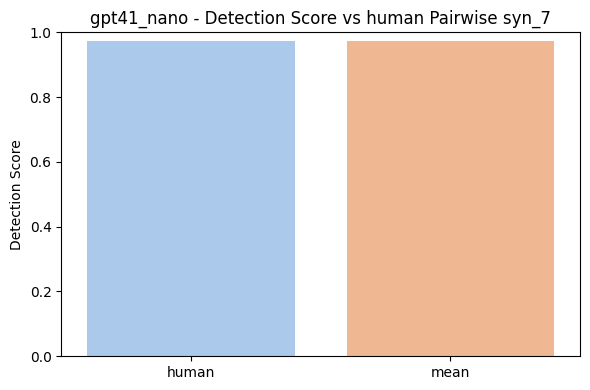

/content/self_recognition/plotting_funcs.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette='muted')


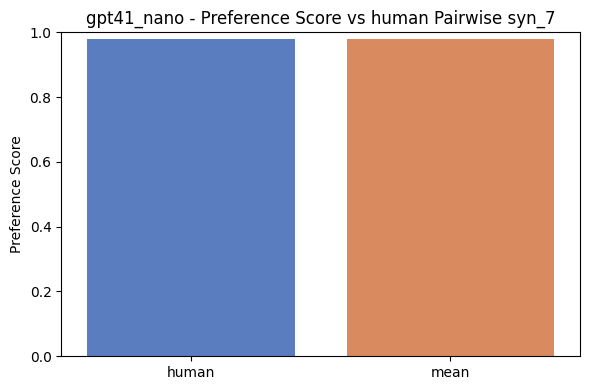

[PLOT: PAIRWISE] results/xsum/gpt41_nano_pp_base_results.json


/content/self_recognition/plotting_funcs.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette='pastel')


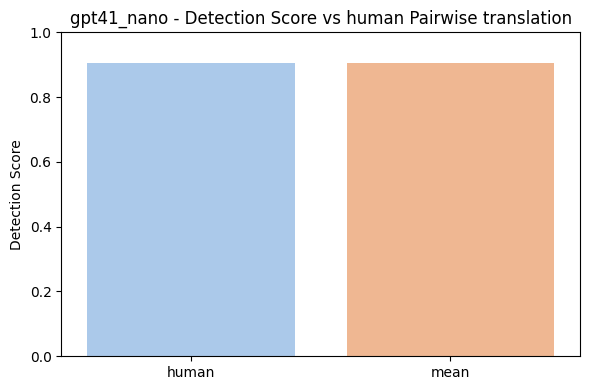

/content/self_recognition/plotting_funcs.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette='muted')


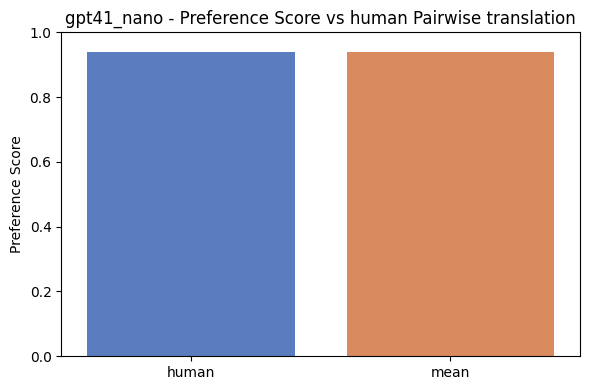

[PLOT: PAIRWISE] results/xsum/gpt41_nano_pp_syn_3_results.json


/content/self_recognition/plotting_funcs.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette='pastel')


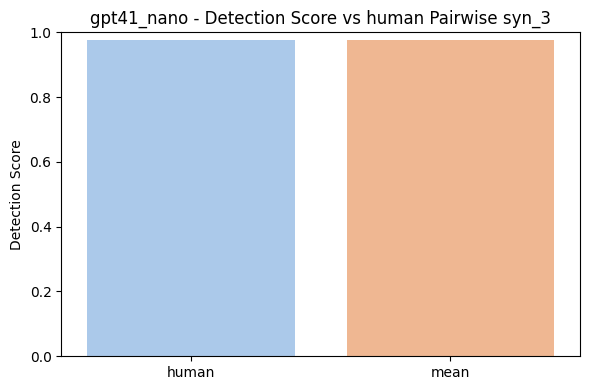

/content/self_recognition/plotting_funcs.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette='muted')


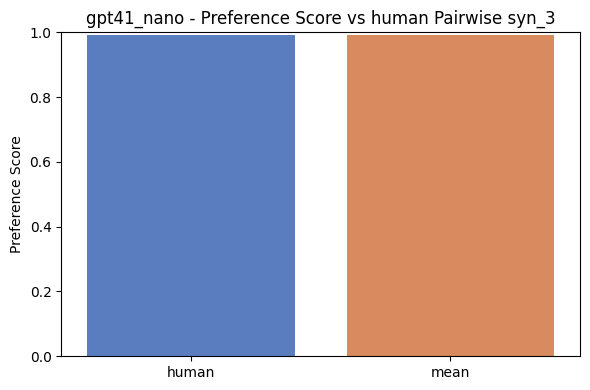

[PLOT: PAIRWISE] results/xsum/gpt41_nano_pp_syn_5_results.json


/content/self_recognition/plotting_funcs.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette='pastel')


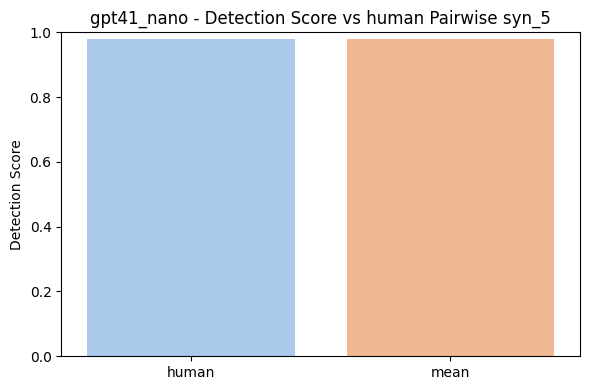

/content/self_recognition/plotting_funcs.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette='muted')


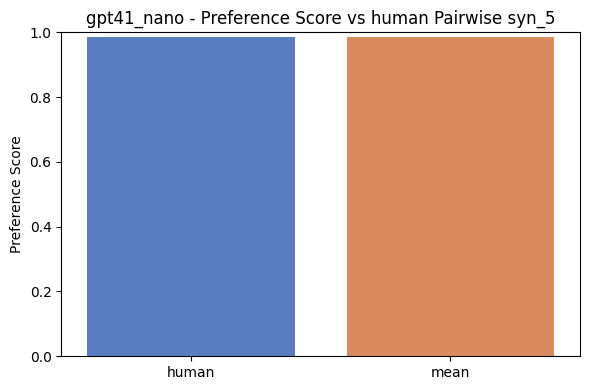

In [ ]:
model = "gpt41_nano"
dataset_name = "xsum"

# ---------- PAIRWISE RESULT PLOTS ----------
pairwise_pattern = f"results/{dataset_name}/{model}_pp*.json"
for path in glob(pairwise_pattern):
    print(f"[PLOT: PAIRWISE] {path}")
    results = load_json(path)

    # Load as dict[model] for compatibility with plot functions
    model_results = {model: results}

    suffix = os.path.basename(path)\
      .replace(f"{model}_pp_", "")\
      .replace("_results", "")\
      .replace(".json", "")
    if suffix == "base":
      suffix="translation"
    # Plot detection and preference scores
    plot_detection_score_pairwise(model_results, model, name=dataset_name, other_models=['human'], title_suffix=f"Pairwise {suffix}")
    plot_self_preference(model_results, model, name=dataset_name,other_models=['human'], title_suffix=f"Pairwise {suffix}")

    pp_results_map[suffix] = get_avg_score(results)

[PLOT: INDIVIDUAL] individual_setting_results/recognition_results/xsum/gpt41_nano_ind_base_results.json


/content/self_recognition/plotting_funcs.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette='Set2')


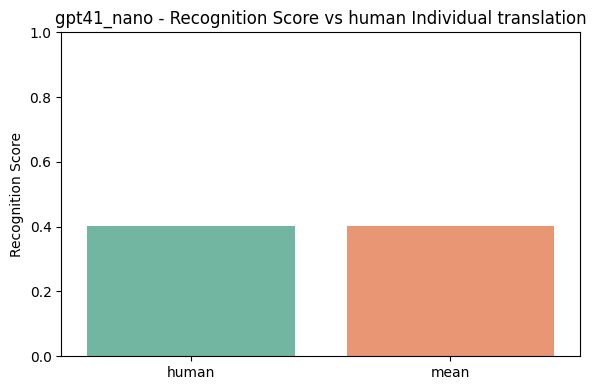

[PLOT: INDIVIDUAL] individual_setting_results/recognition_results/xsum/gpt41_nano_ind_syn_7_results.json


/content/self_recognition/plotting_funcs.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette='Set2')


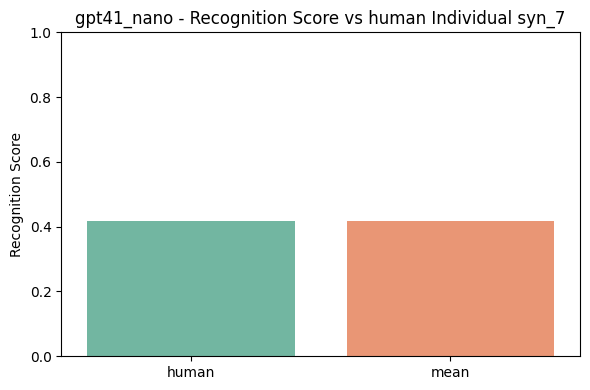

[PLOT: INDIVIDUAL] individual_setting_results/recognition_results/xsum/gpt41_nano_ind_syn_3_results.json


/content/self_recognition/plotting_funcs.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette='Set2')


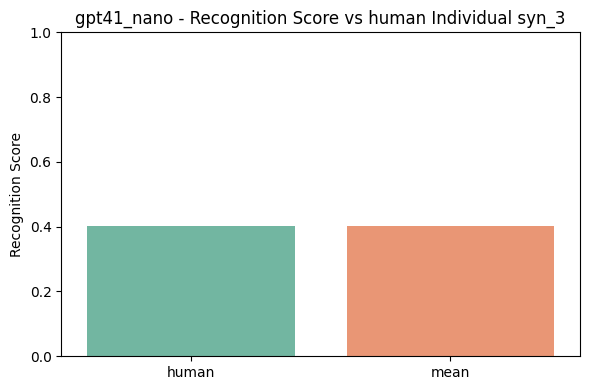

[PLOT: INDIVIDUAL] individual_setting_results/recognition_results/xsum/gpt41_nano_ind_syn_5_results.json


/content/self_recognition/plotting_funcs.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette='Set2')


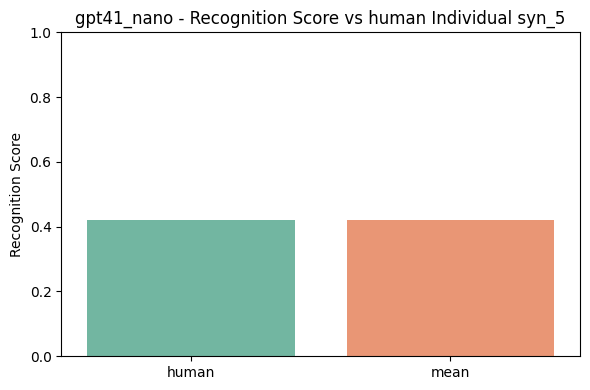

In [ ]:
# ---------- RECOGNITION RESULT PLOTS ----------
recognition_pattern = f"individual_setting_results/recognition_results/{dataset_name}/{model}_ind*.json"


for path in glob(recognition_pattern):
    print(f"[PLOT: INDIVIDUAL] {path}")
    results = load_json(path)

    model_results = {model: results}

    suffix = os.path.basename(path)\
        .replace(f"{model}_ind_", "")\
        .replace("_results", "")\
        .replace(".json", "")

    if suffix == "base":
      suffix="translation"

    # Plot recognition and distribution
    plot_recognition_score(model_results, model, name=dataset_name, targets=['human'], title_suffix=f"Individual {suffix}")

    ind_results_map[suffix] = get_avg_score(results, col="recognition_score")

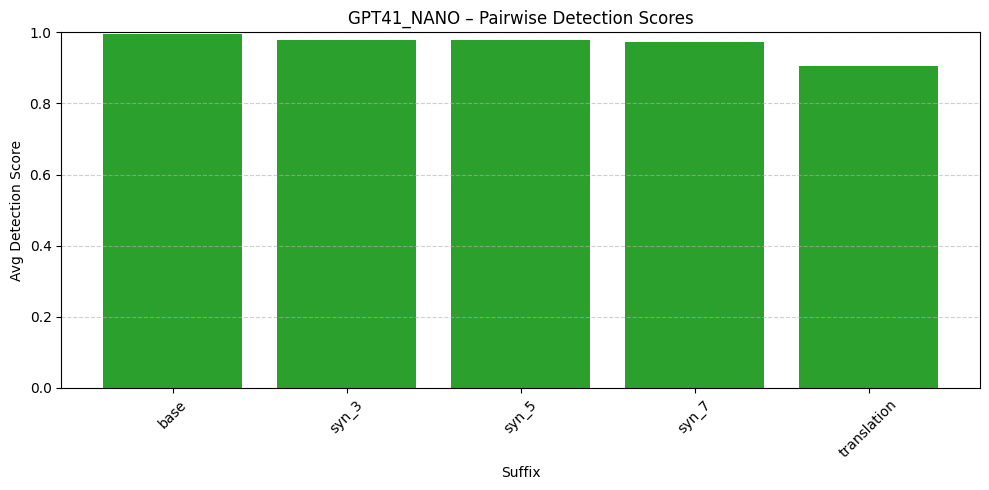

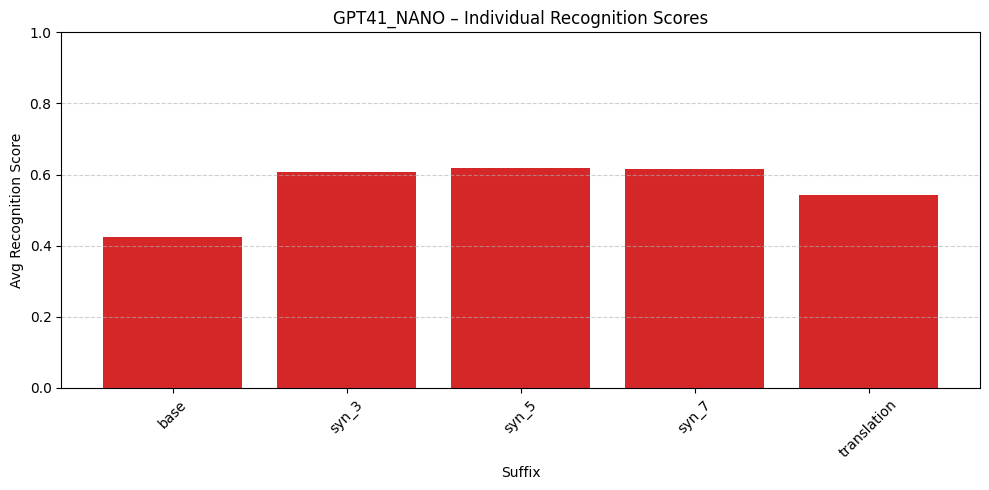

In [ ]:
import matplotlib.pyplot as plt

def plot_result_map(result_map, title, ylabel, color="#1f77b4"):
    """
    Plots a bar chart from a dict like {'run1': 0.6, 'run2': 0.8}
    """
    keys = sorted(result_map.keys())
    values = [result_map[k] for k in keys]

    plt.figure(figsize=(10, 5))
    plt.bar(keys, values, color=color)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Suffix")
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Plot Pairwise Detection Scores
plot_result_map(
    pp_results_map,
    title=f"{model.upper()} – Pairwise Detection Scores",
    ylabel="Avg Detection Score",
    color="#2ca02c"
)

# Plot Individual Recognition Scores
plot_result_map(
    ind_results_map,
    title=f"{model.upper()} – Individual Recognition Scores",
    ylabel="Avg Recognition Score",
    color="#d62728"
)


We might suggest that
1. when GPT4.1 identifies it's own text it does not use logprobs (i had a hypothesis that it might use some comparison of text with internal representations, so if results are applicable to more examples then this experiment rejects this hypothesis);
2. Although, the situation might be a little different in pairwise and individual. With synonyms text is a little worse than original (from observation). So when GPT4 receives an individual text it might think of itself as a bad writer like ChatGPT few years ago.  